# CIFAR-100 DATA VISUALISATION

In this part we will take a look at the data we are using. We focus on the following questions:
- What does our data look like?
- What distribution does this data undergo?
- Analytics of the tabular representation of our data.
- Searching for NULL or missing values.
- Normalization and Standartization processes
- Sketching analytical graphs.

## Analitics of normalized and augmented data

Loading the train and test loaders in order to perform analysis on the normalized and augmented data with the necessary modules for its visualization.

In [2]:
import torch

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

from data_cifar_100 import train_loader, train_set, test_loader, validation_set

100%|██████████| 169M/169M [00:31<00:00, 5.30MB/s] 
/home/biskvitka/PycharmProjects/ml-cnn-transfer-learning/.venv/lib/python3.12/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


The size of training set is 45000 samples
The size of validation set is 5000 samples


Printing the appropriate sizes of training sets:

In [4]:
print(f"The size of training set is {len(train_set)} samples")
print(f"The size of validation set is {len(validation_set)} samples")

The size of training set is 45000 samples
The size of validation set is 5000 samples


Splitting the training dataset in features and targets (labels) for further analytics of the raw data:

In [5]:
train_data = train_set.dataset.data
train_labels = train_set.dataset.targets

Collecting thw first 1000 images from the train loader. They are transformed (e.g., normalization/standartization/horizont flips):

In [6]:
small_batch_images = []
small_batch_labels = []

count = 0
for images, labels in train_loader:
    small_batch_images.append(images)
    small_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_sample = torch.cat(small_batch_images)[:1000]
y_sample = torch.cat(small_batch_labels)[:]

red_pixels   = X_sample[:, 0, :, :]
green_pixels = X_sample[:, 1, :, :]
blue_pixels  = X_sample[:, 2, :, :]

red_image   = red_pixels.cpu().numpy().flatten()
green_image = green_pixels.cpu().numpy().flatten()
blue_image  = blue_pixels.cpu().numpy().flatten()

Plotting some examples from the data loader:

In [7]:
labels = train_loader.dataset.dataset.classes

label_dict = {i: name for i, name in enumerate(labels)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9294117388725281].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9999999964237213].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000076293944].


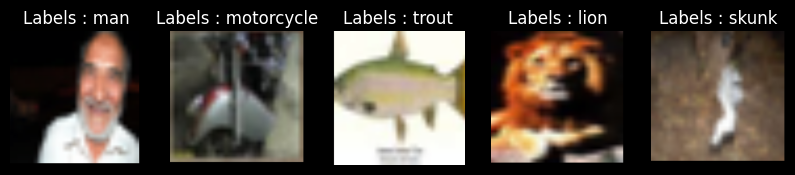

In [8]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.figure(figsize=(10,5))
for i in range(5) :
  plt.subplot(1,5,i+1)
  img = X_sample[i].permute(1, 2, 0).numpy()
  img = (std * (img) + mean) 

  
  plt.axis("off")
  plt.title(f"Labels : {label_dict[y_sample[i].item()]}")
  plt.imshow(img)
plt.show()


Pixels distribution on the original images from `train_dataset`:

In [9]:
red = train_data[:,:,:,0].flatten()
green = train_data[:,:,:,1].flatten()
blue = train_data[:,:,:,2].flatten()

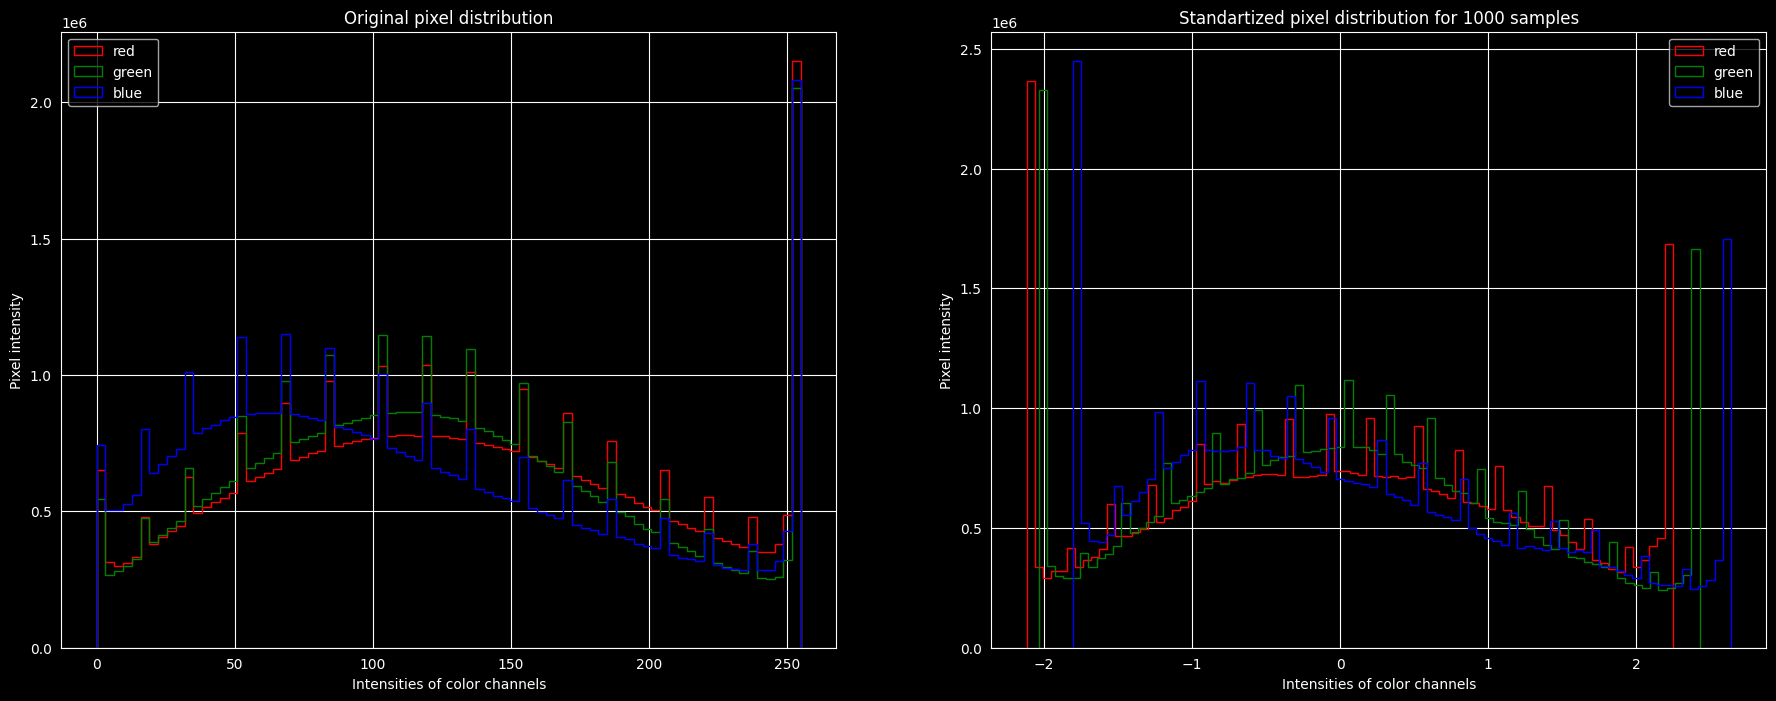

In [10]:
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
plt.hist(red, bins=80,histtype="step",color="red",label="red")
plt.hist(green, bins=80,histtype="step",color="green",label="green")
plt.hist(blue, bins=80,histtype="step",color="blue",label="blue")
plt.xlabel("Intensities of color channels")
plt.title("Original pixel distribution")
plt.legend()
plt.ylabel("Pixel intensity")
plt.subplot(1,2,2)
plt.hist(red_image, bins=80,histtype="step",color="red",label="red")
plt.hist(green_image, bins=80,histtype="step",color="green",label="green")
plt.hist(blue_image, bins=80,histtype="step",color="blue",label="blue")
plt.legend()
plt.xlabel("Intensities of color channels")
plt.ylabel("Pixel intensity")
plt.title("Standartized pixel distribution for 1000 samples")
plt.show()

The red and green channels follow nearly identical distributions, whereas the blue channel is shifted toward lower intensities, suggesting a higher concentration of darker blue pixels. Despite this shift, all channels retain a significant presence of high-intensity pixels.

>Raw Distribution (Left): "Original pixel distribution" illustrates the pixel intensities in their native format (0–255). The histogram reflects the natural dynamic range of the source imagery.

>Normalized Distribution (Right): The "Standardized pixel distribution". The pixel values have been rescaled to center around a mean of 0 with a standard deviation of 1, shifting the range to approximately $[-2, 2.5]$.

Bar chart for mean values for each color on images from the raw dataset:

In [11]:
mean = train_data.mean(axis=(0, 1, 2)) 
std = train_data.std(axis=(0, 1, 2)) 

In [12]:
red_mean = mean[0]
blue_mean = mean[2]
green_mean = mean[1]

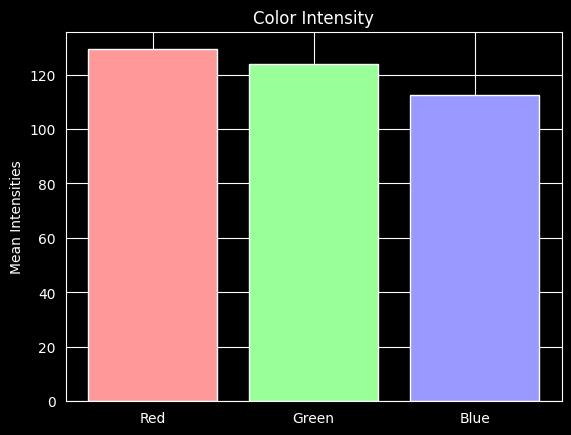

In [13]:
plt.bar( x=["Red","Green", "Blue"],height=[red_mean,green_mean,blue_mean], color=["#ff9999", "#99ff99", "#9999ff"])

plt.xticks()
plt.ylabel("Mean Intensities")
plt.title("Color Intensity")
plt.show()

## Tabular representation of our data

We are reshaping train data, because DataFrame expects 2-dim input:

In [14]:
train_d_reshaped = torch.from_numpy(train_data).reshape(50000,-1)


In [15]:
train_data = pd.DataFrame(train_d_reshaped)
train_targest = pd.DataFrame(train_labels, columns=["Lables"])

In [16]:
train_targest.head()

,Lables
0,19
1,29
2,0
3,11
4,1


Label distribution on the original dataset:

In [112]:
target_values = train_targest.value_counts()

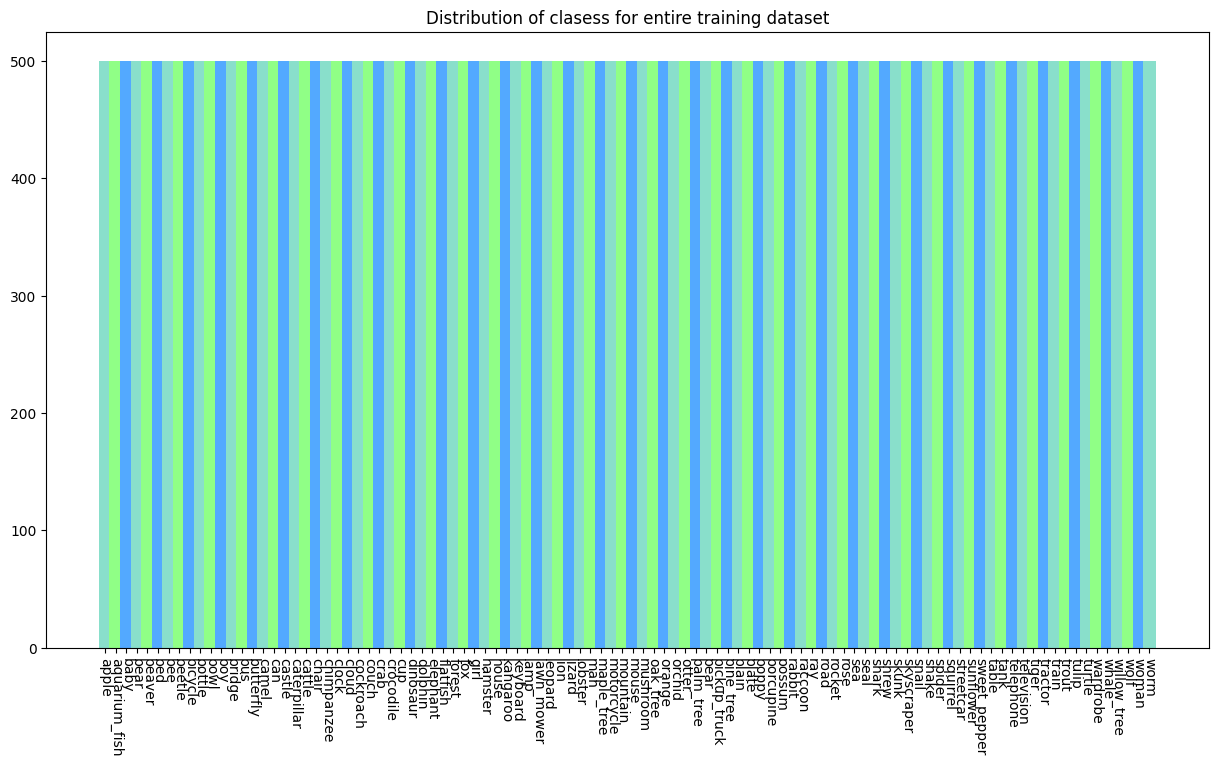

In [145]:
plt.figure(figsize=(15,8))
plt.bar(x=labels, height=target_values,color=["#89dfcb","#90ff86", "#53a9ff"],width=1.2)
plt.title("Distribution of clasess for entire training dataset")
plt.xticks(rotation=-90)
plt.show()

Label distribution in the train_loader:

1. We take indices of the instances in train_set, which correspond to the instances in the original train_dataset.
2. Using list comprehension, we will store the appropriate labels of the desired instances.
3. We count how many times each label occurs in our list.

In [17]:
train_indices = train_set.indices
train_labels_raw = [train_labels[i] for i in train_indices]
counts = [train_labels_raw.count(i) for i in range(100)]

In [18]:
train_dict = {x:y for x,y in zip(labels,counts) }

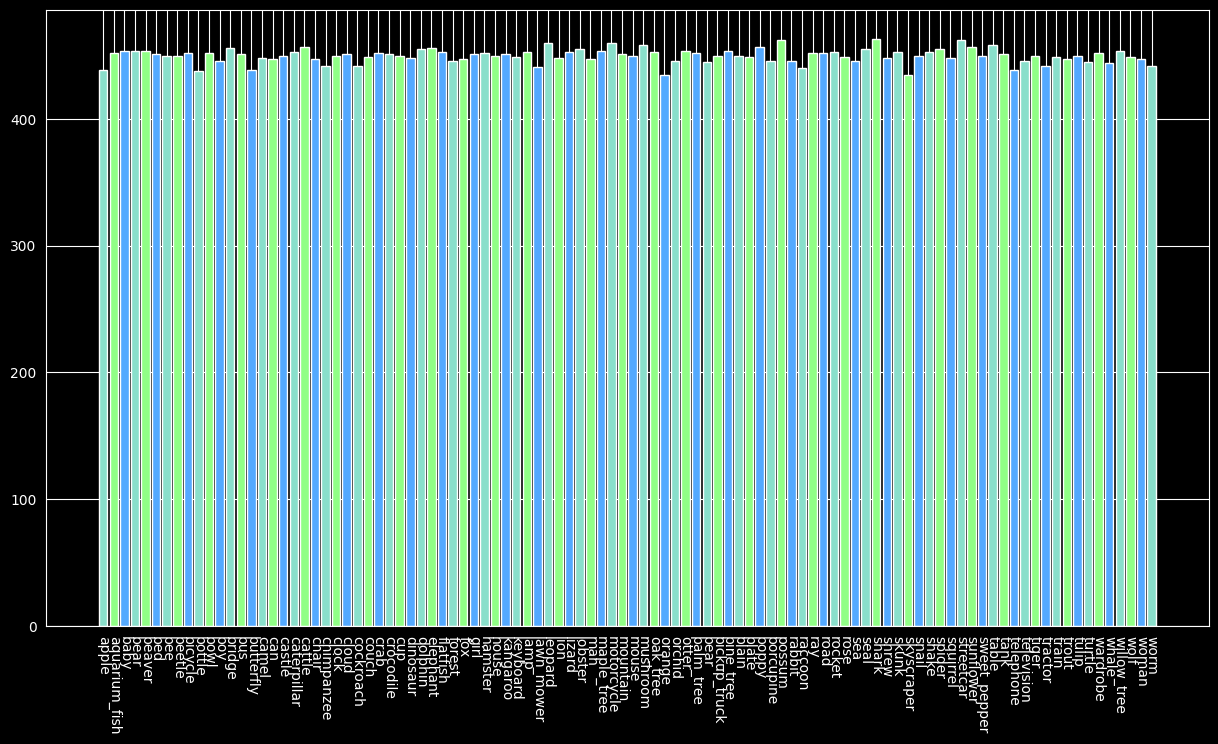

In [19]:
plt.figure(figsize=(15,8))
plt.bar(train_dict.keys(),train_dict.values(),color=["#89dfcb","#90ff86", "#53a9ff"])
plt.xticks(rotation=-90)
plt.show()

Tabular analytics of the original training dataset:

In [21]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,255,255,255,255,255,255,255,255,255,255,...,4,34,36,10,105,133,59,138,173,79
1,255,255,255,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,255,255,255
2,250,250,248,248,249,243,247,248,239,248,...,190,219,209,194,223,216,207,232,230,228
3,124,194,221,131,202,228,135,206,228,138,...,223,230,237,232,243,237,236,243,230,231
4,43,49,46,32,40,34,87,89,47,127,...,78,93,88,60,55,55,29,63,67,37


In [22]:
train_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: uint8(3072)
memory usage: 146.5 MB


In [23]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,133.625820,138.897220,135.018180,133.620260,138.775640,134.77246,134.725600,139.695920,135.522380,135.45466,...,114.882480,128.734560,127.011120,115.011220,128.250380,126.764800,114.989160,128.053120,126.797400,115.323520
std,79.200295,76.739206,82.959109,78.232566,75.777258,82.16237,77.802072,75.335076,81.902624,77.53889,...,74.878401,74.018808,71.650393,75.256193,74.594984,72.219927,75.826336,75.287087,72.893317,76.474594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,77.000000,61.000000,68.000000,78.000000,61.00000,70.000000,80.000000,62.000000,71.00000,...,53.000000,69.000000,71.000000,53.000000,68.000000,70.000000,53.000000,67.000000,69.000000,52.000000
50%,130.000000,137.000000,132.000000,131.000000,138.000000,131.00000,132.000000,139.000000,133.000000,133.00000,...,102.000000,124.000000,121.000000,102.000000,122.000000,121.000000,102.000000,122.000000,120.000000,102.000000
75%,202.000000,204.250000,214.000000,200.000000,202.000000,212.00000,201.000000,203.000000,213.000000,202.00000,...,169.000000,187.000000,179.000000,169.000000,187.000000,179.000000,170.000000,188.000000,180.000000,172.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


Searching for NULL values:

In [24]:
train_data.isnull().sum().sum()

np.int64(0)